[![Advanced Lane Detection & Tracking - Self-Driving Car NanoDegree](https://s3.amazonaws.com/udacity-sdc/github/shield-carnd.svg)](http://www.udacity.com/drive)
## Dean Webb - Advanced Lane Detection & Tracking Pipeline
#### Self-Driving Car Engineer Nanodegee - Project 4
In this project, our goal is to write a software pipeline to identify the lane boundaries in an input video. An example summary of all techniques applied to a test image can be seen below for reference:

---

![alt text][image11]

---
### <font color='green'>Project Goals</font>

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

### Dependencies

The images for camera calibration are stored in the folder called `camera_cal`.  The images in `test_images` are for testing your pipeline on single frames.  If you want to extract more test images from the videos, you can simply use an image writing method like `cv2.imwrite()`, i.e., you can read the video in frame by frame as usual, and for frames you want to save for later you can write to an image file.  

To help the reviewer examine your work, please save examples of the output from each stage of your pipeline in the folder called `ouput_images`, and include a description in your writeup for the project of what each image shows.    The video called `project_video.mp4` is the video your pipeline should work well on.  

The `challenge_video.mp4` video is an extra (and optional) challenge for you if you want to test your pipeline under somewhat trickier conditions.  The `harder_challenge.mp4` video is another optional challenge and is brutal!

---

[//]: # (Image References)

[image1]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/camera_cal/calibration1.jpg "Calibration Input"
[image8]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/output_images/corners_found11.jpg "Undistorted"
[image2]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/test_images/test1.jpg "Test Image Input"
[image4]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/examples/out/apply_perspective_transform.jpg "Perspective Transform Function Snippet"
[image5]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/output_images/green_lines5.jpg "Fit Visual (With Green Lines)"
[image6]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/examples/out/radius_curvature_output.jpg "Radius Curvature Output"
[image7]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/processed_project_video.mp4 "Processed Project Video"
[image9]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/output_images/undistorted0.jpg "Test Image Input"
[image10]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/examples/out/curvature_snippet.jpg "Radius of Curvature Code Snippet"
[image12]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/output_images/thresholded1.jpg "Thresholded - Masked"
[image11]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/examples/out/overview.jpg "Overview"
[image13]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/examples/out/apply_thresholds.jpg "Apply Thresholds"
[image14]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/output_images/thresholded4.jpg "Thresholded"
[image15]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/output_images/color_stacked4.jpg "Color Stacked"
[image16]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/test_images/test5.jpg "Test Image 5"
[image17]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/output_images/thresholded2.jpg "Test Img 3 Thresholded"
[image18]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/output_images/warped2.jpg "Warped 2"
[image19]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/examples/out/inverted_warped_transform.jpg "Inverted Mask Warped 2"
[image20]: https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/examples/out/histogram_analysis.jpg "Histogram Analysis Function"



# <font color='red'> Rubric Points</font>
### Here I will consider the [rubric](https://review.udacity.com/#!/rubrics/571/view) points individually and describe how I addressed each point in my implementation.  

---
### Writeup / README

#### 1. <font color='green'>Provide a Writeup / README</font> that includes all the rubric points and how you addressed each one.  You can submit your writeup as markdown or pdf.

**Done!** - *See below.*

### Camera Calibration

#### 1. Briefly state how you computed the camera matrix and distortion coefficients.  <font color='green'>Provide an example of a distortion corrected calibration image.</font>

* The code for this step is contained in the code cells of the attached IPython notebook. The output is also located in "data/output_images/corners_found11.jpg".  

* I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image.

* Thus, `objp` is just a replicated array of coordinates, and `objpoints` will be appended with a copy of it every time I successfully detect all chessboard corners in a test image.  `imgpoints` will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.

* I then used the output `objpoints` and `imgpoints` to compute the camera calibration and distortion coefficients using the `cv2.calibrateCamera()` function. An example of this process can be seen below:

---

|   Original    |  Undistorted  |
|:-------------:|:-------------:|
|  ![][image1]  |  ![][image8]  |

For added visual effect above, I added the color markings that were computed using `cv2.findChessboardCorners()` - (*See e.g., code cells* **3-4** of `advanced-lane-lines-setup.ipynb`).

---

### Lane-Finding Pipeline (single images)

#### 1. <font color='green'>Provide an example of a distortion-corrected test image.</font>
I also applied this distortion correction to the test image using the `cv2.undistort()` function and obtained this result:

---

|   Test Img      |  Undistorted Img |
|:---------------:|:---------------: |
|   ![][image2]   |   ![][image9]    |

---

#### 2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  <font color='green'>Provide an example of a binary image result.</font>
I used a combination of color and gradient thresholds to generate the binary image, as shown in the code snippet below for convenience. This snippet for applying the thresholds can also be seen in **code cell 12** of `advanced-lane-lines-setup.ipynb`).

---

![alt text][image13]

---

It took quite a long time to figure out the optimal configuration of thresholds to apply. In many ways the values are stil lnot perfect! However, the smoothing factor applied during video generation helps keep track of the lines once they are found. Conveniently, below are some examples of my generated output for my custom thresholding technique. I found the v_channel, s_channel, and l_channel color binary channels carried a lot of information with them, which helped in detection of the lines in the output throsholded image. Please note: The color stacked binary image is not included in the output, it is added here for illustration purposes.

|  Undistorted Img  |   Color Binaries |  Thresholded Img  |
|:-----------------:|:---------------: |:-----------------:|
|   ![][image16]    |   ![][image15]   |   ![][image14]    |

---


#### 3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

The code for my perspective transform includes a function called `apply_perspective_transform()`, which appears in the code snippet (which has been included below for the reviewer's convenience. This snippet for applying the perspective transform can also be seen in **code cell 13** of `advanced-lane-lines-setup.ipynb`).   The `apply_perspective_transform()` function takes as inputs an image (`img`). I also included (as an optional parameter) the M_pickle file, which contains the Transformation Matrix (`M`), as well as the Inverse Transformation Matrix (`Minv`), both of which are calculated by `warpPerspective()` from the OpenCV library. For our purposes, we will use this function with the flag `cv2.INTER_LINEAR`, which is described by the source as a [a bilinear interpolation.](http://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html).

---

![alt text][image4]

---

By including the M_pickle file, the function can optionally bypass the recalculation of the source (`src`) and destination (`dst`) points if the file exists. As hinted by the name, we use this function to warp the image in such a way that it appearsto change its orientation. For example, we will use the image warping to map a bird's eye view of the lane lines so that it would be easier to detect the parallel nature of the lanes. But forst, we must capture the perspective in it's image space. I used a trapezoidal shape with the intention on transforming the points into a rectangular one. Instead of fully hardcoding the source and destination points, the function attempts to partially generate these source (`src`) and destination (`dst`) points based on the image size variables, and the desired trapezoidal destination region. As shown above, these weighted variables shape the trapezoid by plotting its:
* Bottom Trapezoidal Width (`bottom_width`)
* Middle Trapezoidal Width (`mid_width`)
* Percent of the Trapezoidal Height (`height_pct`)
* Percent to Trim from top to bottom - to remove the car's hood (`bottom_trim`)

By tuning these parameters, I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image. Below are examples of my generated output for this perspective transform technique.


|  Undistorted Img  | Persp. Trans Img | Inverted Masked   |
|:-----------------:|:---------------: |:-----------------:|
|   ![][image17]    |   ![][image18]   |   ![][image19]    |


#### 4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

In order to identify the laneline pixels. I used a convolutional technique, which can be found in the `tracker()` class in the `advanced-lane-lines-setup.ipynb` file. The tracker class advantageously has a function called `find_window_centroids` which does a lot of the heavy lifting involved with detecting windows. I found this technique to work much better than my original plan to use a Histogram of pixel in the vertical axis.Once the windows were detected by the tracker class. I did various array manipulations and concatenations to select the `left-lane` points and the `right-lane` points. Next, I further applied some matrix manipulations and region masking in order to fit the detected lane lines within a 2nd order polynomial. I note that the "lines" pixels of the second order polynomial are determined by plotting the windows gathered by the windows centroids from the `tracker` class. More specifically, I used the center of the windows and plotted them in green in order to find the line. Because the windows were detected as a convolution, the was much less noise than the histogram technique. For reference, below is a visualization of the resulting processed image, with the lines detected:

---

![alt text][image5]

---

The code for the above shown image can be found in the `pipeline()` function, which appears in a code cell with the header "Lane Tracking Pipeline." This function accepts a list of images and applies all computer vision techniques on the image to produce an overview (the same overview plotted at the beginning of this report.) In addition to the `pipeline()` function, I similarly created a `process_image()` function to be applied on a single image frame. The key difference between the two methods is that the `process_image()` function bypasses all of the visualization plots, debugger logging and image saving that exists in the `pipeline()` function.

#### 5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

Following this handy [radius of curvature](http://www.intmath.com/applications-differentiation/8-radius-curvature.php) tutorial, I was able to apply the technique on the resulting image. Once these values where calculated I then plotted the values directly onto the image for verification that the lanes are in fact curved. As shown in the code snippet below for convenience, this snippet for calculating the radius of curvature is as follows:

---

![alt text][image10]

---

Note: This snippet is fully shown in various **code cells** of `advanced-lane-lines-setup.ipynb`. Particularly, the radius of curvature is calculated in the `pipeline()` and `process_image()` functions.

#### 6. <font color='green'>Provide an example image of your result</font> plotted back down onto the road such that the lane area is identified clearly.

As noted above, I implemented this step in the `pipeline()` and `process_image()` functions. Here is an example of my result on a test image:

---

![alt text][image6]

---

### Pipeline (video)

#### 1. <font color='green'>Provide a link to your final video output.</font>  Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).

Here's a [link to my video result](https://s3-us-west-1.amazonaws.com/sdc-gpu/p4_data/processed_project_video.mp4)

---

### Discussions / Learnings

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.

The biggest problems I faced with implementation had to do with the `mpimg().imread` versus `cv2.imread()` functions for reading in images. Not only do these libraries differ in their orientation of the matrix (`BGR`) for Open CV functions, versus (`RGB`) for `impimg.imread()` functions. This took quite some time getting used to and I still have occasional hiccups with that implementation.

Another issue was that originally I used a Histogram to try and detect the polynomial fitted lines, but I found the method to not be very accurate. As such, in order to order to identify the lane pixels, I implemented the convolutional technique described above. However, I still found the Histogram function to be quite useful for debugging and tuning my parameters for region masking. As an example of how I used this, I include below an analysis function I utilized to tweak my parameters:

---

![alt text][image20]

---

Since I implemented. By far the best strategy I used was the `pipeline()` function, as it goes through and applies all of the required transformations and then saves the images into a directory. This strategy allowed my to slowly develop and to "fail fast." That is, I was able to recognize bugs in the code or mistakes in my logic by simply looking at the output image each step. I initially tried to implement the vehicle detection tracking project without this intermediary process of plotting and saving example images. I believe this will help me further limit the false positives that have been plaguing my results (and delaying my submission).

I am satisfied with my lane line detection accuracy but I definitely believe I could spend a great deal more time on the project perfecting that. I would like to investigate some techniques that might allow me to plot lanes for **very sharp turns** I quickly released after testing with the `harder_challenge.mp4` video that there are many improvements to be made to the algorithm I used. I noticed many scenarios that easily broke my lane detection algorithms, such as the road changing color. I believe the investigation is in order to look into optimizing may lane-detection algorithm. I am pretty motivated to complete this **sooner rather than later**, since I plan to participate in the [Didi and Udacity Self Driving Car Challenge](https://www.udacity.com/didi-challenge)!

One more optimization I think would be great is if I could design the code to obviously run faster. I was more concerned with accuracy than speed for this project. Now that things are fairly accurate, I would investigate how to get it to process faster than the single-image-per-second threshold.

Still further, I think this detection would be a prime candidate to apply deep learning techniques. That is to say, to train a convolutional neural network to take in the input as an image and predict a list of window centroids that are centered on the left and right lanes. In fact, I think that if I implement such an algorithm I would be able to satisfy all 3 of my optimization ideas.


### Import Dependencies

In [3]:
# Camera Calibration
import numpy as np
import cv2
import glob
import pickle
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Constants

In [4]:
WORKING_DIRECTORY = 'data/'
IMAGE_EXTENSION = '.jpg'
OUTPUT_DIRECTORY = 'output_images/'
DATACACHE_DIRECTORY = "datacache/"

# Calibration Constants #
CALIBRATION_DIRECTORY = 'camera_cal/'
CALIBRATION_PREFIX = 'corners_found'
calibration_path = "{}{}{}".format(WORKING_DIRECTORY, CALIBRATION_DIRECTORY, '*'+IMAGE_EXTENSION)
dist_pickle_file = os.path.join(WORKING_DIRECTORY, DATACACHE_DIRECTORY, "calibration_pickle.p")
CHESSBOARD_SIZE = (9,6)

# Threshold Constants #
TEST_IMAGE_DIRECTORY = 'test_images/'
THRESHOLDING_PREFIX = 'thresholded'
COLOR_STACKED_PREFIX = 'color_stacked'
UNDISTORTED_PREFIX = 'undistorted'
TEST_IMAGES_PREFIX = 'test'
test_images_path = "{}{}{}".format(WORKING_DIRECTORY, TEST_IMAGE_DIRECTORY, TEST_IMAGES_PREFIX+'*'+IMAGE_EXTENSION)

# Perspective Transform Constants #
WARPED_PREFIX = 'warped'
M_pickle_file = os.path.join(WORKING_DIRECTORY, DATACACHE_DIRECTORY, "M_Minv_pickle.p")

# Lane Tracking Constants #
LINES_DRAWN_PREFIX = 'green_lines'
TRACKED_PREFIX = 'tracked'

### Camera Calibration

In [5]:
# Calibrate the camera using a 9x6 checkerboard
objp = np.zeros((CHESSBOARD_SIZE[1]*CHESSBOARD_SIZE[0], 3), np.float32)
objp[:,:2] = np.mgrid[0:CHESSBOARD_SIZE[0], 0:CHESSBOARD_SIZE[1]].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = [] # 3-Dim points in real-world space
imgpoints = [] # 2-Dim points in virtual image plane

# Load Calibration Images 
calibration_images = glob.glob(calibration_path, recursive=True)

# Walk through images and search for checkerboard corners
for idx, fname in enumerate(calibration_images):
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Find the checkerboard corners
    ret, corners = cv2.findChessboardCorners(gray, CHESSBOARD_SIZE, None)
    
    # If found, add object points, image points
    if ret == True:
        print('Calibrating image:', fname)
        imgpoints.append(corners)
        objpoints.append(objp)
        
        # Draw and display found corners
        cv2.drawChessboardCorners(img, CHESSBOARD_SIZE, corners, ret)
        output_img_path = "{}{}{}{}{}".format(WORKING_DIRECTORY, OUTPUT_DIRECTORY, CALIBRATION_PREFIX
                                              ,str(idx), IMAGE_EXTENSION)
        print('Saving Calibrated image:', output_img_path)
        os.makedirs(os.path.join(WORKING_DIRECTORY, OUTPUT_DIRECTORY), exist_ok=True)
        cv2.imwrite(output_img_path, img)

Calibrating image: data/camera_cal/calibration10.jpg
Saving Calibrated image: data/output_images/corners_found1.jpg
Calibrating image: data/camera_cal/calibration11.jpg
Saving Calibrated image: data/output_images/corners_found2.jpg
Calibrating image: data/camera_cal/calibration12.jpg
Saving Calibrated image: data/output_images/corners_found3.jpg
Calibrating image: data/camera_cal/calibration13.jpg
Saving Calibrated image: data/output_images/corners_found4.jpg
Calibrating image: data/camera_cal/calibration14.jpg
Saving Calibrated image: data/output_images/corners_found5.jpg
Calibrating image: data/camera_cal/calibration15.jpg
Saving Calibrated image: data/output_images/corners_found6.jpg
Calibrating image: data/camera_cal/calibration16.jpg
Saving Calibrated image: data/output_images/corners_found7.jpg
Calibrating image: data/camera_cal/calibration17.jpg
Saving Calibrated image: data/output_images/corners_found8.jpg
Calibrating image: data/camera_cal/calibration18.jpg
Saving Calibrated i

### Save Calibration Variables to Pickle File

In [6]:
# Load image for reference
if os.path.exists(dist_pickle_file):
    dist_pickle = pickle.load( open(dist_pickle_file, "rb"))
else:
    dist_pickle = {}

img = cv2.imread(calibration_images[0])
img_size = (img.shape[1], img.shape[0])

# Perform calibration given object points and image points
if ("mtx" in dist_pickle and "dist" in dist_pickle):
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
else:
    ret, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Save camera calibration result data
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist

os.makedirs(os.path.join(WORKING_DIRECTORY, DATACACHE_DIRECTORY), exist_ok=True)
pickle.dump(dist_pickle, open(dist_pickle_file, "wb"))

### Undistort Test Images

In [7]:
import pickle

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open(dist_pickle_file, "rb"))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

### Sobel and Gradient Thresholding Functions

In [8]:
def abs_sobel_thresh(sobel_img, sobel_kernel=9, thresh=(20, 100)):
    # Take the absolute value on Sobel function
    abs_sobel = np.absolute(sobel_img)
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output

In [9]:
def mag_threshold(sobelx, sobely, sobel_kernel=9, mag_thresh=(0, 255)):
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return mag_binary

In [10]:
def dir_threshold(sobelx, sobely, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    dir_binary =  np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    return dir_binary

### Lane Tracker Class

In [179]:
import numpy as np
import cv2
class tracker():
    def __init__(self, win_width, win_height, margin, y_m = 1, x_m = 1, smoothing_factor = 30):
        # List that stores all the past (left, right) center set values used for smoothing the output
        # Average over the center to try to smooth out the result
        self.recent_centers = []
        
        # Window pixel width of center values, used to count pixels inside center windows to determine curve values
        self.window_width = win_width
        
        # Window pixel height of center values, used to count pixels inside center windows to determine curve values
        # Note: Breaks the image into vertical levels
        self.window_height = win_height
        
        
        
        # The pixel distance in both directions to slide left_window + right_window template for searching
        self.margin = margin # "Padding" how much the window's allowed to slide around

        # Meters per pixel in vertical dimension
        self.ym_per_pixel = y_m 
        
        # Meters per pixel in horizontal dimension
        self.xm_per_pixel = x_m
        
        self.smooth_factor = smoothing_factor
            
    # Main tracking function below - Used to find and store lane segment positions
    # Note: Uses 'Window Sliding' technique - Find centroid of pixels using 1-Dim convolution in vertical axis
    def find_window_centroids(self, warped):
        window_width = self.window_width
        window_height = self.window_height
        margin = self.margin
        
        window_centroids = [] # Store the (left, right) window centroid positions per level - 9 slices
        window = np.ones(window_width) # Create our convolutional window template that we will use for convolutions
        
        # 1) First Find the starting positions for the left and right lane by using np.sum
        # to get the vertical image slice with the window template

        # Histogram Calculation - Sum quarter bottom of image to get slice, could use a different ratio
        l_sum = np.sum(warped[(3*warped.shape[0]//3):,:(warped.shape[1]//2)], axis=0)
        l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
        r_sum = np.sum(warped[(3*warped.shape[0]//3):, (warped.shape[1]//2):], axis=0)
        r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+(warped.shape[1]//2)
        
        average_centers = np.average(self.recent_centers[-self.smooth_factor:], axis = 0)
        
        if average_centers
        
        # Add what we found for the first layer
        window_centroids.append((l_center, r_center))
        
        # Append each layer looking for max pixel locations
        for level in range(1, (int)(warped.shape[0]/window_height)):
            # Restart algorithm from position 1 - Convolve the window into the vertical slice of the image
            
            # For Single channel image
            image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):
                                        int(warped.shape[0]-level*window_height),:], axis=0)
            conv_signal = np.convolve(window, image_layer)
            # Find the best left centroid by using past left center as a reference
            # Use window_width/2 as offset because the convolution signal
            # eference is at right side of window, not center of window
            offset = window_width//2
            l_min_index = int(max(l_center+offset-margin,0))
            l_max_index = int(min(l_center+offset+margin,warped.shape[1]))
            l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset

            # Find the best right centroid by using past right center as a reference
            r_min_index = int(max(r_center+offset-margin,0))
            r_max_index = int(min(r_center+offset+margin, warped.shape[1]))
            r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
            
            # Add what we found for that layer
            window_centroids.append((l_center, r_center))

        self.recent_centers.append(window_centroids)
        # return averaged values of the line centers, helps to keep the markers from jumping aroud
        return np.average(self.recent_centers[-self.smooth_factor:], axis = 0)

### Window Masking Function - For Lane Tracking

In [154]:
def window_mask(width, height, img_ref, center, level):
    output = np.zeros_like(img_ref)
    
    # Fill in template with ones
    output[int(img_ref.shape[0]-(level+1)*height):
           int(img_ref.shape[0]-level*height),
           max(0, int(center-width)):min(int(center+width), img_ref.shape[1])] = 1
    
    return output

In [13]:
# Define a function to scale .PNG and JPEG Files both to 0 to 1 
def normalize_pixels(img):
    max_pixel_value = np.max(img)
    if max_pixel_value > 1.0:
        img = np.copy(np.multiply(img, 1.0 / 255.0)).astype(np.float64) 
    return img

# Define a function to scale .PNG and JPEG Files both to 0 to 1 
def denormalize_pixels(img):
    max_pixel_value = np.max(img)
    if max_pixel_value <= 1.0:
        img = np.copy(np.multiply(img, 255.0)).astype(np.float64) 
    return img

In [14]:
def apply_thresholds(img, kernel_size=13, l_thresh=(115, 130), v_thresh=(190, 255), s_thresh=(150, 255), sx_thresh=(22, 100), sy_thresh=(25, 40)):   
    img = np.copy(img)

    # Convert to HLS color space and separate the S and L channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    v_channel = hsv[:,:,2]

    # Threshold l-channel
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
    
    # Threshold s-channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Threshold v-channel
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel >= v_thresh[0]) & (v_channel <= v_thresh[1])] = 1
    
    # Sobel Operator
    sobelx = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(v_channel, cv2.CV_64F, 0, 1, ksize=kernel_size)

    # Calculate Abs value and Threshold pixels after Sobel Operator
    gradx_binary = abs_sobel_thresh(sobelx, sobel_kernel=15, thresh=sx_thresh)
    grady_binary = abs_sobel_thresh(sobely, sobel_kernel=15, thresh=sy_thresh)
    
    # Threshold magnitude and direction gradients
    mag_binary = mag_threshold(sobelx, sobely, sobel_kernel=kernel_size, mag_thresh=(30, 100))
    dir_binary = dir_threshold(sobelx, sobely, sobel_kernel=15, thresh=(0.7, 1.3))

    # Stack 2 channels for color_binary
    color_binary = np.dstack(( l_binary, s_binary, v_binary))

    combined = np.zeros_like(s_channel)
    combined[((v_binary == 1) & (s_binary == 1)) |
            ((gradx_binary == 1) & (v_binary == 1)) |
            ((mag_binary == 1) & (dir_binary == 1)) |
            ((l_binary == 1) & (mag_binary == 1) & (v_binary == 1)) |
            ((mag_binary == 1) & (v_binary == 1))] = 1        
    return color_binary, combined

### Perform Perspective Transform

In [164]:
def apply_perspective_transform(image, filepath=None, M_pickle={}):
    img = np.copy(image)
    img_size = (img.shape[1], img.shape[0])
    bottom_width = .72 # Percent of bottom Trapezoidal Height Previous
    mid_width = .12 # Percent of middle Trapezoidal Height
    height_pct = .64 # Percent of Trapezoidal Height
    bottom_trim = .850 # Percent from top to bottom to avoid car's hood
      
    if filepath:
        head, filename = os.path.split(filepath)
        # Set M and Minv variables to load from Datacache
        M_str = "M_" + filename
        Minv_str = "Minv_" + filename
    else:
        M_str = "M_"+str(image)
        Minv_str = "Minv_"+str(image)
        
    if (M_str in M_pickle and Minv_str in M_pickle):
        M = M_pickle[M_str]
        Minv = M_pickle[Minv_str]
        warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    else: # Reload 
        ## Calculate Source Points ##
        src_pt_1 = [img.shape[1]*(.5-mid_width/2), img.shape[0]*height_pct]
        src_pt_2 = [img.shape[1]*(.5+mid_width/2),img.shape[0]*height_pct]
        src_pt_3 = [img.shape[1]*(.5+bottom_width/2),img.shape[0]*(bottom_trim/2+.5)]
        src_pt_4 = [img.shape[1]*(.5-bottom_width/2),img.shape[0]*(bottom_trim/2+.5)]
        src = np.float32([src_pt_1, src_pt_2, src_pt_3, src_pt_4])

        ## Calculate Destination Points ##
        offset = img_size[0]*.23
        dst_pt_1 = [offset, 0]
        dst_pt_2 = [img_size[0]-offset, 0]
        dst_pt_3 = [img_size[0]-offset, img_size[1]]
        dst_pt_4 = [offset, img_size[1]]
        dst = np.float32([dst_pt_1, dst_pt_2, dst_pt_3, dst_pt_4])

        M = cv2.getPerspectiveTransform(src, dst)  
        Minv = cv2.getPerspectiveTransform(dst, src)            
        warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
        warped = denormalize_pixels(warped)

        # Overwrite Datacache
        M_pickle[M_str] = M
        M_pickle[Minv_str] = Minv
    # Return image 
    return M, Minv, warped

### Radius of Curvature Calculation
To determine the Radius of curvature, it is advantageous to (1) select 3 points within the given lane lines, (2) calculate the respective slopes between them, (3) Then use the combination of the slopes and the points to find the circle that intersects all 3 points. This will give us the **exact** calculation of the radius, as opposed to an approximation. Note: We must remember to (a) take the negative of the slope (since y_positive is oriented **downward**). We must also be aware of (b) **indeterminant** values (0 denominator). (c) If we get a slope of infinity, -infinity, or zero or of the like, we should shift our calculation "upward" That is, towards the horizon and try the calculation again.

In [165]:
def calculate_radius_of_curvature(lane_points):
    # Select points
    low, high = 0, len(lane_points)-1
    mid = len(lane_points)//2+1
    
    #Calculate good equi-distant points, where the midpoint is at the center point of the detected curve
    A = lane_points[low]
    B = lane_points[mid]
    C = lane_points[high]
    
    # Calculate slopes        
    x, y = 0, 1
    
    # If slope is verticle, divide lane lines in half and try again.. until you find a slope
    if (B[x] - A[x]) != 0:
        m1 = -np.float64((B[y] - A[y])/(B[x] - A[x]))
    else:
        m1 = 1e8
        
    if (C[x] - B[x]) != 0:
        m2 = -np.float64((C[y] - B[y])/(C[x] - B[x]))
    else:
        m2 = 1e8
        
    # Calculate the Center x Point 
    X_c = (m1*m2*(A[y]-C[y])+m2*(A[x]+B[x])-m1*(B[x]+ C[x]))/2*(m2-m1)
    
    # Calculate the Center y Point (calculate the first perpindicular bysector)
    Y_c = -0.5*(X_c - (A[x]+B[x])/2.) + (A[y]+B[y])/2.
    
    # Calculate the Radius of Curvature
    rad_curv = np.sqrt((B[x] - A[x])**2 + (B[y] - A[y])**2)
    
    # Return the radius
    return rad_curv

### Lane Tracking Pipeline

In [177]:
# Load Test Images
test_images = glob.glob(test_images_path, recursive=True)

def pipeline(test_images):
    # Load Picklefile
    M_pickle_file = os.path.join(WORKING_DIRECTORY, DATACACHE_DIRECTORY, "M_Minv_pickle.p")
    if os.path.exists(M_pickle_file):
        M_pickle = pickle.load( open(M_pickle_file, "rb"))
    else:
        M_pickle = {}

    # Walk through test images
    for idx, filepath in enumerate(test_images):
        img = mpimg.imread(filepath)
        
        head, filename = os.path.split(filepath)
        # Set M and Minv variables to load from Datacache
        M_str = "M_" + filename
        Minv_str = "Minv_" + filename

        # Undistort the image
        img = cv2.undistort(img, mtx, dist, None, mtx)
        color_binary, preprocessed_img = apply_thresholds(img)
        
        # Perspective Transform of Image       
        M, Minv, warped = apply_perspective_transform(preprocessed_img, filepath, M_pickle)
            
        # Instantiate Tracker() class for lane tracking
        window_width = warped.shape[1]//25
        window_height = warped.shape[0]//9
        real_to_pix_x = 4./384
        real_to_pix_y = 30./720
        
        curve_centers = tracker(win_width=window_width, win_height=window_height, margin = 25,
                                y_m = real_to_pix_y, x_m = real_to_pix_x, smoothing_factor = 30)
        
        # Use tracking function to find centroids for drawing lane lines
        window_centroids = curve_centers.find_window_centroids(warped)
        
        # Points used to draw all the left and right windows
        l_points = np.zeros_like(warped)
        r_points = np.zeros_like(warped)
        
        # Points used to find the left and right lanes
        right_x = []
        left_x = []
        
        # Go through even levels and draw the windows
        for level in range(0,len(window_centroids)):
            # Utilize window_mask function above to draw window areas
            l_mask = window_mask(window_width, window_height, warped, window_centroids[level][0], level)
            r_mask = window_mask(window_width, window_height, warped, window_centroids[level][1], level)
            
            # Add center value found in frame to the list of lane points per left, right
            left_x.append(window_centroids[level][0])
            right_x.append(window_centroids[level][1])
            
            # Add graphic points from window mask here to total pixels found
            l_points[(l_points == 255) | ((l_mask == 1.))] = 255
            r_points[(r_points == 255) | ((r_mask == 1.))] = 255
        
        ## Draw the results ##
        # Add both left and right pixels together
        template = np.array(r_points+l_points, np.uint8)
        
        # Create a zero color channel
        zero_channel = np.zeros_like(template)
        
        # Make window pixels green
        template = np.array(cv2.merge((zero_channel, template, zero_channel)), np.uint8)
        warped = denormalize_pixels(warped)
        
        # Making the original road pixels 3 color channels
        channeled_warped = np.array(cv2.merge((warped, warped, warped)), np.uint8)        
        
        # Overlay the original road image with window results
        result = cv2.addWeighted(channeled_warped, 1, template, 0.5, 0.)
        
    
        # Fit the lane boundaries to the left, right, and center positions
        yvals = range(0, warped.shape[0])
        res_yvals = np.arange(warped.shape[0]-(window_height/2),0,-window_height)
        
        left_fit = np.polyfit(res_yvals, left_x, 2)
        # Degree 2 polynomial
        left_fitx = left_fit[0]*yvals*yvals + left_fit[1]*yvals + left_fit[2]
        left_fitx = np.array(left_fitx, np.int32)
        
        right_fit = np.polyfit(res_yvals, right_x, 2)
        # Degree 2 polynomial
        right_fitx = right_fit[0]*yvals*yvals + right_fit[1]*yvals + right_fit[2]
        right_fitx = np.array(right_fitx, np.int32)
        
        # Restructure/Encapsulate array values (to make it pretty)
        left_lane = np.array(list(zip(np.concatenate((left_fitx-window_width/2, left_fitx[::-1]+window_width/2), axis=0),
                                     np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)
        right_lane = np.array(list(zip(np.concatenate((right_fitx-window_width/2, right_fitx[::-1]+window_width/2), axis=0),
                                      np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)
        middle_lane = np.array(list(zip(np.concatenate((right_fitx-window_width/2, right_fitx[::-1]+window_width/2), axis=0),
                                       np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)
          
        # Recast x and y points
        pts_left = np.array([np.transpose(np.vstack([left_fitx, yvals]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, yvals])))])
        pts = np.hstack((pts_left, pts_right))

        road = np.zeros_like(img)
        road_background = np.zeros_like(img)
        
        # Draw the lane onto the warped blank image
        cv2.fillPoly(road, np.int_([pts]), (0,200, 200))
        cv2.fillPoly(road, [left_lane], color=[255,0, 50])
        cv2.fillPoly(road, [right_lane], color=[50, 0, 255])
        
        # Use these to make negate pixels during cv2.addWeighted
        cv2.fillPoly(road_background, [left_lane], color=[255, 255, 255])
        cv2.fillPoly(road_background, [right_lane], color=[255, 255, 255])

        road_inv_warped = cv2.warpPerspective(road, Minv, img_size, flags=cv2.INTER_LINEAR)
        road_inv_warped_background = cv2.warpPerspective(road_background, Minv, img_size, flags=cv2.INTER_LINEAR)
        
        # Draw lines back on image
        base = cv2.addWeighted(img, 1.0, road_inv_warped_background, -1.0, 0.0)        
        tracked_result = cv2.addWeighted(base, 1.0, road_inv_warped, 1.0, 0.0)        
        
        xm_per_pix = curve_centers.xm_per_pixel
        ym_per_pix = curve_centers.ym_per_pixel
        
        # Calculate the offset of the car on the road
        camera_center = (left_fitx[-1] + right_fitx[-1])/2
        center_diff = (camera_center-warped.shape[1]/2)*xm_per_pix
        side_pos = 'left'
        if center_diff <= 0:
            side_pos = 'right'
        
        ## Radius of Curvature (Resource: http://www.intmath.com/applications-differentiation/8-radius-curvature.php)
        curve_fit_cr =np.polyfit(np.array(res_yvals, np.float32)*ym_per_pix, 
                                 np.array(left_x, np.float32)*xm_per_pix, 2)

       
        
        # Note: Calculated using the left lane line
        curve_rad = ((1 + (2*curve_fit_cr[0]*yvals[-1]*ym_per_pix + 
                           curve_fit_cr[1])**2)**1.5)/np.absolute(2*curve_fit_cr[0])
        
        # Draw the radius of curvature, offset, and speed
        cv2.putText(tracked_result, 'Radius of Curvature = ' + str(round(curve_rad, 3)) + '(m)', 
                    (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.putText(tracked_result, 'Vehicle is ' + str(abs(round(center_diff, 3))) + 'm '+ side_pos 
                    + ' of center', (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        
        ## Save Transitional Images Generated and Results to Output Directory ##
        undistorted_img_path = "{}{}{}{}{}".format(WORKING_DIRECTORY, OUTPUT_DIRECTORY, UNDISTORTED_PREFIX
                                                  ,str(idx), IMAGE_EXTENSION)
        color_stacked_img_path = "{}{}{}{}{}".format(WORKING_DIRECTORY, OUTPUT_DIRECTORY, COLOR_STACKED_PREFIX
                                                  ,str(idx), IMAGE_EXTENSION)
        thresholded_img_path = "{}{}{}{}{}".format(WORKING_DIRECTORY, OUTPUT_DIRECTORY, THRESHOLDING_PREFIX
                                                  ,str(idx), IMAGE_EXTENSION)
        warped_img_path = "{}{}{}{}{}".format(WORKING_DIRECTORY, OUTPUT_DIRECTORY, WARPED_PREFIX
                                                  ,str(idx), IMAGE_EXTENSION)
        lined_img_path = "{}{}{}{}{}".format(WORKING_DIRECTORY, OUTPUT_DIRECTORY, LINES_DRAWN_PREFIX
                                                  ,str(idx), IMAGE_EXTENSION)
        tracked_img_path = "{}{}{}{}{}".format(WORKING_DIRECTORY, OUTPUT_DIRECTORY, TRACKED_PREFIX
                                                  ,str(idx), IMAGE_EXTENSION)
    
        os.makedirs(os.path.join(WORKING_DIRECTORY, OUTPUT_DIRECTORY), exist_ok=True)

        print('')
        print('Saving Undistorted Result image:', undistorted_img_path)
        img = cv2.cvtColor(np.copy(img), cv2.COLOR_BGR2RGB)
        cv2.imwrite(undistorted_img_path, img)

        print('Saving Color Stacked image:', color_stacked_img_path)
        mpimg.imsave(color_stacked_img_path, color_binary)

        print('Saving Thresholded image:', thresholded_img_path)
        mpimg.imsave(thresholded_img_path, preprocessed_img, cmap='gray')
        
        print('Saving Warped image:', warped_img_path)
        mpimg.imsave(warped_img_path, warped, cmap='gray')
        
        print('Saving Curved Lines Drawn on Warped image:', lined_img_path)
        mpimg.imsave(lined_img_path, result)
        
        print('Saving Resulting Tracked Image Drawn on Warped image:', tracked_img_path)
        mpimg.imsave(tracked_img_path, tracked_result)
    
        # Plot Transitional Images for Analysis
        f, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(2, 4, figsize=(48, 25))
        f.tight_layout()
        
        img = cv2.cvtColor(np.copy(img), cv2.COLOR_BGR2RGB)
        ax0.imshow(img)
        ax0.set_title('Undistorted Image_'+str(idx), fontsize=40)
        
        ax1.imshow(color_binary)
        ax1.set_title('Color Maps Thresholded', fontsize=40)

        ax2.imshow(preprocessed_img, cmap='gray')
        ax2.set_title('Combined Gradients', fontsize=40)
        
        ax3.imshow(warped, cmap='gray')
        ax3.set_title('Perspective Transforms', fontsize=40)
        
        # Inverse Warped Image
        inv_warped = cv2.warpPerspective(warped, Minv, img_size, flags=cv2.INTER_LINEAR)
        ax4.imshow(inv_warped, cmap='gray')
        ax4.set_title('Inverted Warped Image_'+str(idx), fontsize=40)
        
        # Calculate Histogram
        warped_mid_y = warped.shape[0]//4
        histogram = np.sum(warped[warped_mid_y:,:], axis=0)
        ax5.plot(histogram)
        ax5.set_title('Histogram of Warped', fontsize=40)
        
        # Print Final Result
        ax6.imshow(result)
        ax6.set_title('Warped - Curved Lines Drawn', fontsize=40)
        
        # Print Final Tracked Result
        ax7.imshow(tracked_result, cmap='gray')
        ax7.set_title('Result - Tracked Image', fontsize=40)
        
        # Adjust subplots
        plt.subplots_adjust(left=0., right=1, top=0.99, bottom=0.)
        
    # Save to Picklefile
    pickle.dump(M_pickle , open( M_pickle_file, "wb" ) )
        


Saving Undistorted Result image: data/output_images/undistorted0.jpg
Saving Color Stacked image: data/output_images/color_stacked0.jpg
Saving Thresholded image: data/output_images/thresholded0.jpg
Saving Warped image: data/output_images/warped0.jpg
Saving Curved Lines Drawn on Warped image: data/output_images/green_lines0.jpg
Saving Resulting Tracked Image Drawn on Warped image: data/output_images/tracked0.jpg


error: /Users/jenkins/miniconda/1/x64/conda-bld/work/opencv-3.1.0/modules/core/src/arithm.cpp:639: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function arithm_op


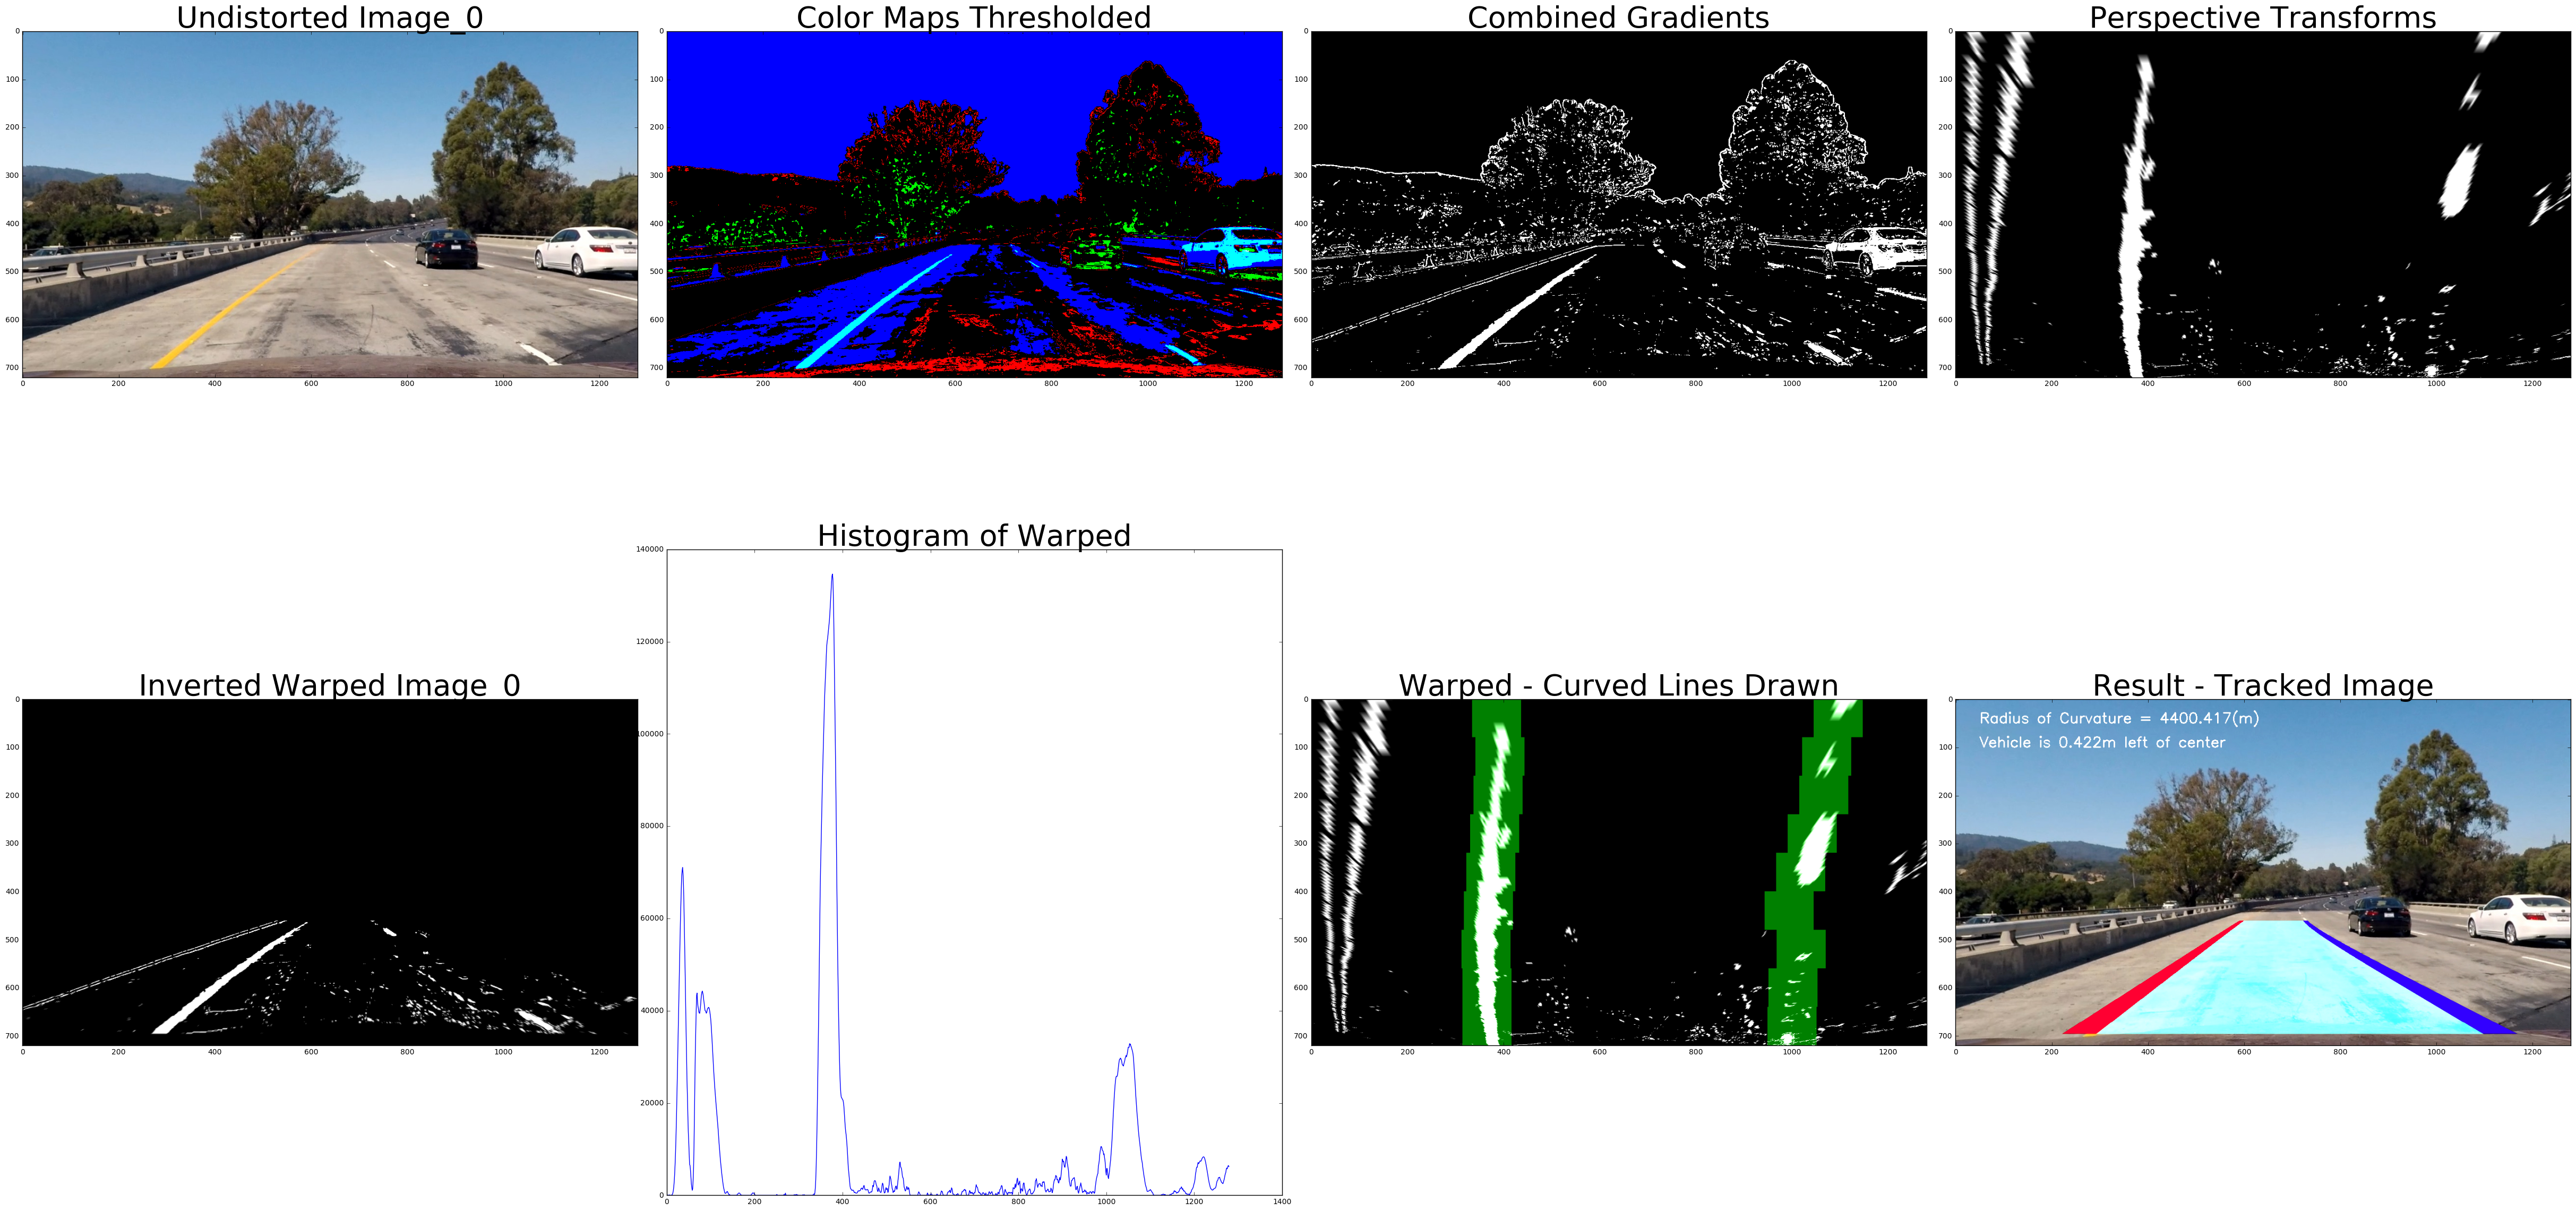

In [178]:
pipeline(test_images)

### Video Generation

In [171]:
def process_image(image):
    # Load Calibration Picklefile
    dist_pickle = pickle.load( open(dist_pickle_file, "rb"))
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]

    # Undistort the image
    img = cv2.undistort(image, mtx, dist, None, mtx)
    color_binary, preprocessed_img = apply_thresholds(img)

    # Perspective Transforms of Image
    img_size = (img.shape[1], img.shape[0])
    bottom_width = .768 # Percent of bottom Trapezoidal Height Previous - 74
    mid_width = .15 # Percent of middle Trapezoidal Height
    height_pct = .635 # Percent of Trapezoidal Height
    bottom_trim = .87 # Percent from top to bottom to avoid car's hood

    ## Perform Perspective Transform ##
    M, Minv, warped = apply_perspective_transform(preprocessed_img)

    # Instantiate Tracker() class for lane tracking
    window_width = warped.shape[1]//30 
    window_height = warped.shape[0]//10 
    real_to_pix_x = 4./384
    real_to_pix_y = 30./720

    curve_centers = tracker(win_width = window_width, win_height = window_height, margin = 25,
                            y_m = real_to_pix_y, x_m = real_to_pix_x, smoothing_factor = 45)

    # Use tracking function to find centroids for drawing lane lines
    window_centroids = curve_centers.find_window_centroids(warped)

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Points used to find the left and right lanes
    right_x = []
    left_x = []

    # Go through even levels and draw the windows
    for level in range(0,len(window_centroids)):
        # Utilize window_mask function above to draw window areas
        l_mask = window_mask(window_width, window_height, warped, window_centroids[level][0], level)
        r_mask = window_mask(window_width, window_height, warped, window_centroids[level][1], level)

        # Add center value found in frame to the list of lane points per left, right
        left_x.append(window_centroids[level][0])
        right_x.append(window_centroids[level][1])

        # Add graphic points from window mask here to total pixels found
        l_points[(l_points == 255) | ((l_mask == 1.))] = 255
        r_points[(r_points == 255) | ((r_mask == 1.))] = 255

    ## Draw the results back on Image ##
    # Add both left and right pixels together
    template = np.array(r_points+l_points, np.uint8)

    # Create a zero color channel
    zero_channel = np.zeros_like(template)

    # Make window pixels green
    template = np.array(cv2.merge((zero_channel, template, zero_channel)), np.uint8)
    warped = denormalize_pixels(warped)

    # Making the original road pixels 3 color channels
    warpage = np.array(cv2.merge((warped, warped, warped)), np.uint8)        

    # Overlay the original road image with window results
    result = cv2.addWeighted(warpage, 1, template, 0.5, 0.)

    # Fit the lane boundaries to the left, right, and center positions
    yvals = range(0, warped.shape[0])
    res_yvals = np.arange(warped.shape[0]-(window_height/2),0,-window_height)

    left_fit = np.polyfit(res_yvals, left_x, 2)
    # Degree 2 polynomial
    left_fitx = left_fit[0]*yvals*yvals + left_fit[1]*yvals + left_fit[2]
    left_fitx = np.array(left_fitx, np.int32)

    right_fit = np.polyfit(res_yvals, right_x, 2)
    # Degree 2 polynomial
    right_fitx = right_fit[0]*yvals*yvals + right_fit[1]*yvals + right_fit[2]
    right_fitx = np.array(right_fitx, np.int32)

    # Restructure/Encapsulate array values (to make it pretty)
    left_lane = np.array(list(zip(np.concatenate((left_fitx-window_width/2, left_fitx[::-1]+window_width/2), axis=0),
                                 np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)
    right_lane = np.array(list(zip(np.concatenate((right_fitx-window_width/2, right_fitx[::-1]+window_width/2), axis=0),
                                  np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)
    middle_lane = np.array(list(zip(np.concatenate((right_fitx-window_width/2, right_fitx[::-1]+window_width/2), axis=0),
                                   np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)

    # Recast x and y points
    pts_left = np.array([np.transpose(np.vstack([left_fitx, yvals]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, yvals])))])
    pts = np.hstack((pts_left, pts_right))

    road = np.zeros_like(img)
    road_background = np.zeros_like(img)

    # Draw the lane onto the warped blank image
    cv2.fillPoly(road, np.int_([pts]), (0,200, 200))
    cv2.fillPoly(road, [left_lane], color=[255,0, 50])
    cv2.fillPoly(road, [right_lane], color=[50, 0, 255])

    # Use these to make negate pixels during cv2.addWeighted
    cv2.fillPoly(road_background, [left_lane], color=[255, 255, 255])
    cv2.fillPoly(road_background, [right_lane], color=[255, 255, 255])
    
    road_inv_warped = cv2.warpPerspective(road, Minv, img_size, flags=cv2.INTER_LINEAR)
    road_inv_warped_background = cv2.warpPerspective(road_background, Minv, img_size, flags=cv2.INTER_LINEAR)

    # Draw lines back on image
    base = cv2.addWeighted(img, 1.0, road_inv_warped_background, -1.0, 0.0)        
    tracked_result = cv2.addWeighted(base, 1.0, road_inv_warped, 1.0, 0.0)        

    xm_per_pix = curve_centers.xm_per_pixel
    ym_per_pix = curve_centers.ym_per_pixel

    # Calculate the offset of the car on the road
    camera_center = (left_fitx[-1] + right_fitx[-1])/2
    center_diff = (camera_center-warped.shape[1]/2)*xm_per_pix
    side_pos = 'left'
    if center_diff <= 0:
        side_pos = 'right'

    ## Radius of Curvature (Resource: http://www.intmath.com/applications-differentiation/8-radius-curvature.php)
    curve_fit_cr =np.polyfit(np.array(res_yvals, np.float32)*ym_per_pix, 
                             np.array(left_x, np.float32)*xm_per_pix, 2)

    # Note: Calculated using the left lane line
    curve_rad = ((1 + (2*curve_fit_cr[0]*yvals[-1]*ym_per_pix + 
                       curve_fit_cr[1])**2)**1.5)/np.absolute(2*curve_fit_cr[0])

    # Calculate the radius of curvature for the left and right lanes
    #left_rad_curve = calculate_radius_of_curvature(curve_fit_)
    #right_rad_curve = calculate_radius_of_curvature(right_x)
    # Average the two radii
    #rad_curve = np.mean(left_rad_curve, right_rad_curve)

    # Draw the radius of curvature, offset, and speed
    cv2.putText(tracked_result, 'Radius of Curvature = ' + str(round(curve_rad, 4)) + '(m)', 
                (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(tracked_result, 'Vehicle is ' + str(abs(round(center_diff, 3))) + 'm '+ side_pos 
                + ' of center', (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Return Tracked result
    return tracked_result

### Analyze Histogram of Difficult Warped Images
In order to determine the correct thresholds and hyperparameters to detect the lane lines, I included this code cell to analyze the more difficult images. For example, if the video had a few frames that did not track the lane lines well, I would would create a snapshot of a single frame and then try and tweak the parameters until the lane was in an acceptable range.

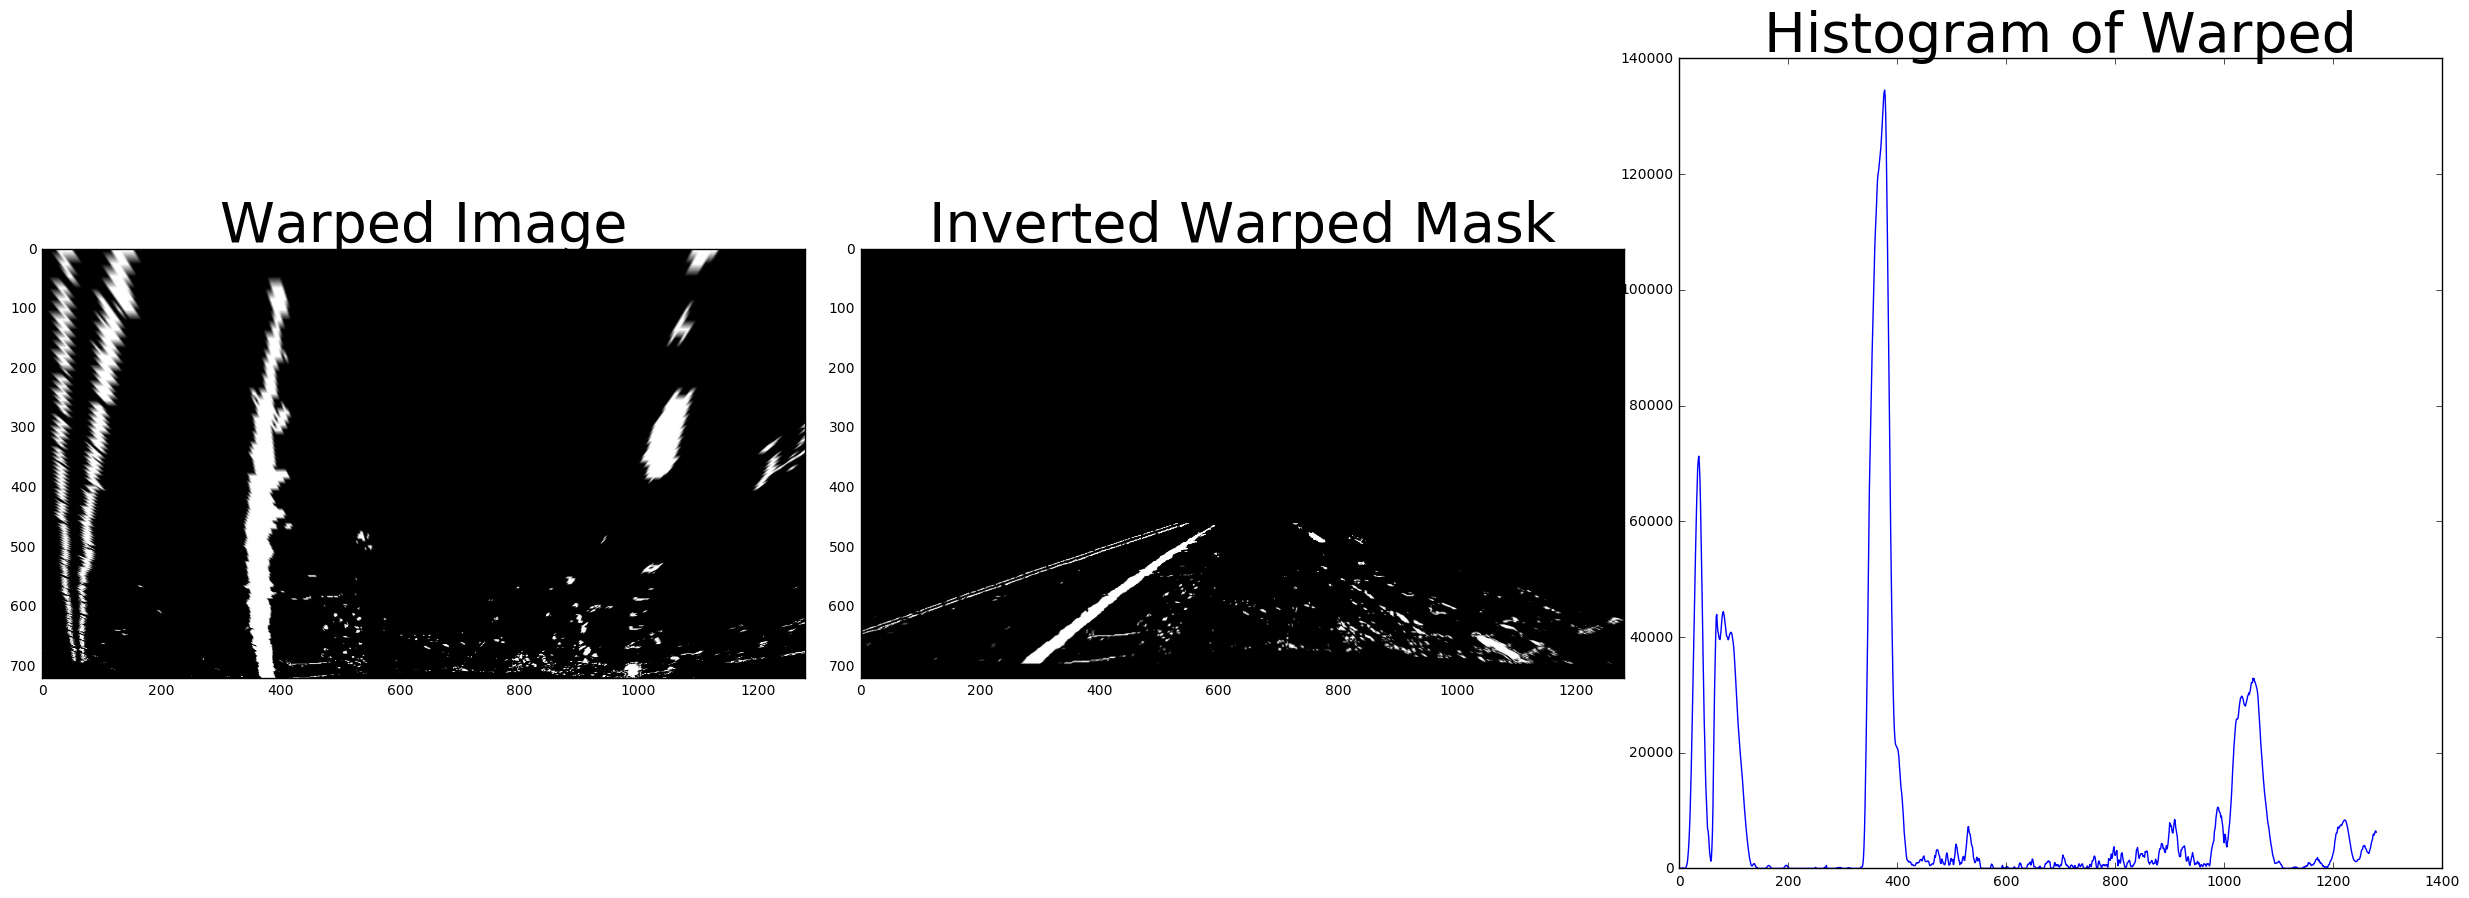

In [172]:
## Analyze Error Prone Lanes ## 
# Load Picklefiles
dist_pickle = pickle.load( open(dist_pickle_file, "rb"))
M_pickle = pickle.load( open(M_pickle_file, "rb"))

# Load Most Difficult Image to process
filename = TEST_IMAGES_PREFIX+'2'+IMAGE_EXTENSION # First two images are 'straight lines' 
M_str = "M_" + filename
Minv_str = "Minv_" + filename
M = M_pickle[M_str]
Minv = M_pickle[Minv_str]

# Load Warped Image
warped_img_path = os.path.join(WORKING_DIRECTORY, OUTPUT_DIRECTORY, WARPED_PREFIX+'0'+IMAGE_EXTENSION)
warped = mpimg.imread(warped_img_path)
warped = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)

# Inverse Warpe Image
inv_warped = cv2.warpPerspective(warped, Minv, img_size, flags=cv2.INTER_LINEAR)

# Plot Histogram of Test Image
f, ((ax0, ax1, ax2)) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax0.imshow(warped, cmap='gray')
ax0.set_title('Warped Image', fontsize=40)

ax1.imshow(inv_warped, cmap='gray')
ax1.set_title('Inverted Warped Mask', fontsize=40)

# Calculate Histogram
warped_mid_y = warped.shape[0]//4
histogram = np.sum(warped[warped_mid_y:,:], axis=0)
ax2.plot(histogram)
ax2.set_title('Histogram of Warped', fontsize=40)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Process Video

In [174]:
#Import packages to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

## Constants ##
# Video Filenames
CHALLENGE_VIDEO = 'challenge_video.mp4'
PROJECT_VIDEO = 'project_video.mp4'
HARDER_CHALLENGE_VIDEO = 'harder_challenge_video.mp4'
# Input path
VIDEO_FILE_PATH = os.path.join(WORKING_DIRECTORY, PROJECT_VIDEO)
# Output Path
VIDEO_OUTPUT_PATH = os.path.join(WORKING_DIRECTORY, OUTPUT_DIRECTORY, 'processed_'+PROJECT_VIDEO)

## Process Videos ##
clip = VideoFileClip(VIDEO_FILE_PATH)
subclip = VideoFileClip(VIDEO_FILE_PATH).subclip(26,35)
project_clip = subclip.fl_image(process_image)
#%time

## Save Video File to Output Directory ##
os.makedirs(os.path.join(WORKING_DIRECTORY, OUTPUT_DIRECTORY), exist_ok=True)
project_clip.write_videofile(VIDEO_OUTPUT_PATH, audio=False)

# Format Output Path
HTML("""
<video width="960" height="540" controls>
 <source src="{0}">
</video>
""".format(VIDEO_OUTPUT_PATH))

[MoviePy] >>>> Building video data/output_images/processed_project_video.mp4
[MoviePy] Writing video data/output_images/processed_project_video.mp4


100%|█████████▉| 225/226 [02:41<00:00,  1.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: data/output_images/processed_project_video.mp4 



In [173]:
#Import packages to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

## Constants ##
# Video Filenames
CHALLENGE_VIDEO = 'challenge_video.mp4'
PROJECT_VIDEO = 'project_video.mp4'
HARDER_CHALLENGE_VIDEO = 'harder_challenge_video.mp4'
# Input path
VIDEO_FILE_PATH = os.path.join(WORKING_DIRECTORY, PROJECT_VIDEO)
# Output Path
VIDEO_OUTPUT_PATH = os.path.join(WORKING_DIRECTORY, OUTPUT_DIRECTORY, 'processed_'+PROJECT_VIDEO)

## Process Videos ##
clip = VideoFileClip(VIDEO_FILE_PATH)
project_clip = clip.fl_image(process_image)
#%time

## Save Video File to Output Directory ##
os.makedirs(os.path.join(WORKING_DIRECTORY, OUTPUT_DIRECTORY), exist_ok=True)
project_clip.write_videofile(VIDEO_OUTPUT_PATH, audio=False)

# Format Output Path
HTML("""
<video width="960" height="540" controls>
 <source src="{0}">
</video>
""".format(VIDEO_OUTPUT_PATH))

[MoviePy] >>>> Building video data/output_images/processed_project_video.mp4
[MoviePy] Writing video data/output_images/processed_project_video.mp4


100%|█████████▉| 1260/1261 [13:57<00:00,  1.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: data/output_images/processed_project_video.mp4 

